In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow
from keras.models import Sequential # To initialise the nn as a sequence of layers
from keras.layers import Convolution2D # To make the convolution layer for 2D images
from keras.layers import MaxPooling2D # 
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import RMSprop
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import data
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow import repeat as rp

csv=CSVLogger("2_adamR30-OR.log")
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32,(2,2),input_shape = (224,224,1), activation = 'relu',strides=2,name='convo1'))
classifier.add(Convolution2D(64,(3,3), activation = 'relu',name='convo2'))
# Step 1 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Step 2 - Convolution
classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo3'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 3 - Convolution
classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo4'))
# Step 3 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
#Step 4 - Flattening

classifier.add(Flatten())

classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(1024, activation = 'relu'))

'''classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(512, activation = 'relu'))
'''

classifier.add(BatchNormalization())
classifier.add(Dropout((0.4)))
classifier.add(Dense(10, activation = 'softmax'))

In [4]:
import matplotlib.pyplot as plt
adam = Adam(epsilon = 0.01)
classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

curr_path = os.getcwd()
basefolder = os.path.dirname(curr_path)
train_folder = os.path.join(basefolder, "../DatasetITA-OR/Train")
test_folder = os.path.join(basefolder, "../DatasetITA-OR/Test")
train_set=tensorflow.data
train_set = train_datagen.flow_from_directory(train_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')


test_set = test_datagen.flow_from_directory(test_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')
classifier.metrics_names




Found 1202 images belonging to 10 classes.
Found 182 images belonging to 10 classes.


[]

In [5]:
#nb_conda_kernels

In [6]:
history = classifier.fit(train_set,steps_per_epoch=train_set.n/32,epochs=30,validation_data=test_set,validation_steps=test_set.n/32,callbacks=[csv],verbose=1)

Epoch 1/30
37/37 [==============================] - 27s 684ms/step - loss: 3.3194 - accuracy: 0.1106 - val_loss: 2.3133 - val_accuracy: 0.0934
Epoch 2/30
37/37 [==============================] - 20s 538ms/step - loss: 2.8799 - accuracy: 0.1215 - val_loss: 2.3046 - val_accuracy: 0.1099
Epoch 3/30
37/37 [==============================] - 20s 530ms/step - loss: 2.7857 - accuracy: 0.1331 - val_loss: 2.3086 - val_accuracy: 0.1209
Epoch 4/30
37/37 [==============================] - 20s 529ms/step - loss: 2.6176 - accuracy: 0.1797 - val_loss: 2.3054 - val_accuracy: 0.1319
Epoch 5/30
37/37 [==============================] - 20s 533ms/step - loss: 2.2270 - accuracy: 0.2920 - val_loss: 2.2801 - val_accuracy: 0.1374
Epoch 6/30
37/37 [==============================] - 20s 527ms/step - loss: 1.9035 - accuracy: 0.4027 - val_loss: 2.2518 - val_accuracy: 0.1593
Epoch 7/30
37/37 [==============================] - 20s 524ms/step - loss: 1.3487 - accuracy: 0.5707 - val_loss: 2.2439 - val_accuracy: 0.1978

In [7]:
classifier.save('2_adam_30epR-OR.h5')


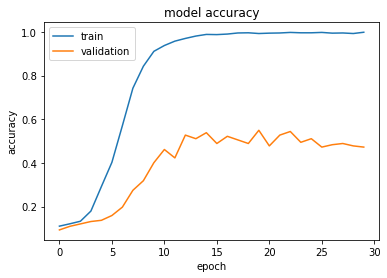

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']) #validation
plt.plot(history.history['val_accuracy']) #train
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()